# Data Preparation

In [242]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [247]:
dir = '/Users/Loielaine/Desktop/umich-2019/EECS545/project/code/545project/'
train = np.loadtxt(dir+'train_sample5.csv',delimiter=',')
test = np.loadtxt(dir+'test_sample5.csv',delimiter=',')

In [248]:
X_train = train[:,:-3]
y_train = train[:,-3:]
X_test = test[:,:-3]
y_test = test[:,-3:]

In [249]:
y_train0 = y_train[:,0]
y_train1 = y_train[:,1] 
y_train2 = y_train[:,2] 

In [250]:
# scaling
def MinMaxScaling(X):
    scaler =preprocessing.MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    return X

In [251]:
X_train = MinMaxScaling(X_train)
X_test = MinMaxScaling(X_test)

## Reshape data

In [252]:
# reshape feature matrix
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_train.shape

(9655, 1, 40)

In [253]:
# reshape feature matrix
X_test = X_test.reshape(X_test.shape[0], 1,X_test.shape[1])
X_test.shape

(2414, 1, 40)

# Model 1 - 2 hidden layer

In [254]:
import keras
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, Input, TimeDistributed 

In [256]:
model1 = Sequential() #layers [1,50,50,50,50,1]
model1.add(LSTM(input_shape=(1,40),units=150,return_sequences=True))
model1.add(Dropout(0.3))
model1.add(LSTM(input_shape=(None,150),units=100,return_sequences=True))
model1.add(Dropout(0.3))
model1.add(LSTM(input_shape=(None,100),units=100,return_sequences=True))
model1.add(Dropout(0.3))
model1.add(LSTM(100,return_sequences=False))
model1.add(Dropout(0.3))
model1.add(Dense(3, activation='relu'))
# model.add(Activation("sigmoid"))
#start = time.time()
model1.compile(loss="mse", optimizer="rmsprop")
#print("Compilation Time : ", time.time() - start)
print(model1.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_62 (LSTM)               (None, 1, 150)            114600    
_________________________________________________________________
dropout_62 (Dropout)         (None, 1, 150)            0         
_________________________________________________________________
lstm_63 (LSTM)               (None, 1, 100)            100400    
_________________________________________________________________
dropout_63 (Dropout)         (None, 1, 100)            0         
_________________________________________________________________
lstm_64 (LSTM)               (None, 1, 100)            80400     
_________________________________________________________________
dropout_64 (Dropout)         (None, 1, 100)            0         
_________________________________________________________________
lstm_65 (LSTM)               (None, 100)             

In [257]:
history1 = model1.fit(X_train,y_train,batch_size=24,epochs=100,validation_split=0.1)

Train on 8689 samples, validate on 966 samples
Epoch 1/100
8689/8689 [==============================] - 10s 1ms/step - loss: 398.7063 - val_loss: 409.7515
Epoch 2/100
8689/8689 [==============================] - 6s 655us/step - loss: 374.8662 - val_loss: 404.1683
Epoch 3/100
8689/8689 [==============================] - 6s 675us/step - loss: 370.8881 - val_loss: 396.3875
Epoch 4/100
8689/8689 [==============================] - 5s 572us/step - loss: 366.8390 - val_loss: 398.4035
Epoch 5/100
8689/8689 [==============================] - 5s 563us/step - loss: 363.1392 - val_loss: 385.9922
Epoch 6/100
8689/8689 [==============================] - 6s 659us/step - loss: 355.9485 - val_loss: 379.7789
Epoch 7/100
8689/8689 [==============================] - 6s 699us/step - loss: 350.1150 - val_loss: 372.6968
Epoch 8/100
8689/8689 [==============================] - 5s 621us/step - loss: 344.6804 - val_loss: 367.6212
Epoch 9/100
8689/8689 [==============================] - 5s 614us/step - loss: 341

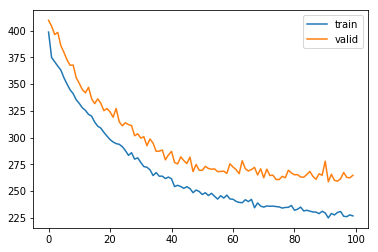

In [258]:
# plot history
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [419]:
y_pred0 = model1.predict(X_test)[:,0]

In [420]:
mse0 = mean_squared_error(y_test[:,0],y_pred0)

In [421]:
mse0

59.66795783704873

In [422]:
y_pred1 = model1.predict(X_test)[:,1]

In [423]:
mse1 = mean_squared_error(y_test[:,1],y_pred1)

In [424]:
mse1

162.67182000616793

In [425]:
y_pred2 = model1.predict(X_test)[:,2]

In [426]:
mse2 = mean_squared_error(y_test[:,2],y_pred2)

In [427]:
mse2

497.42270344341375

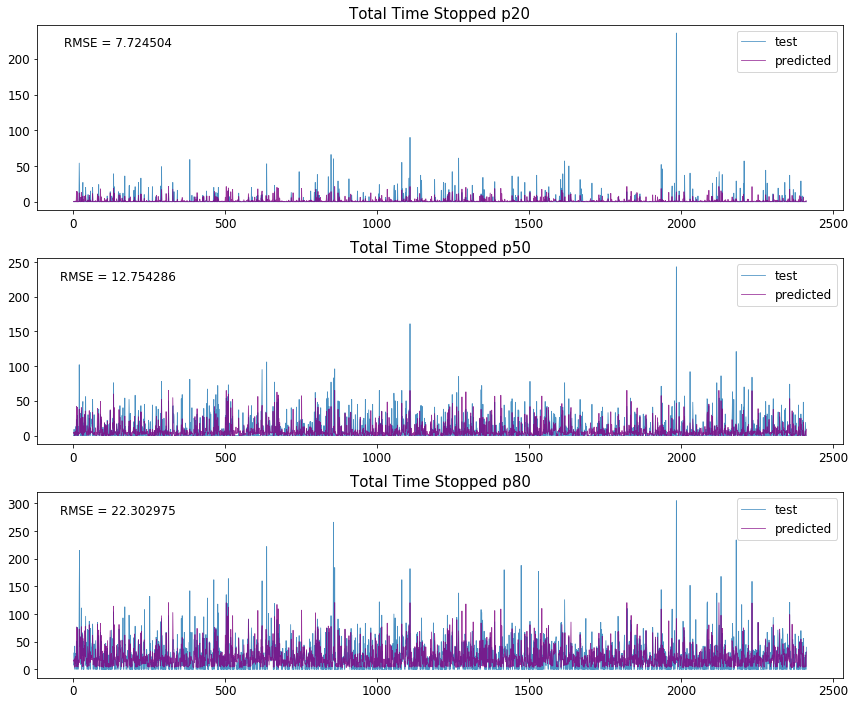

In [428]:
fig, axs = plt.subplots(3,1,figsize=(12,10))
axs[0].plot(y_test[:,0],label='test', linewidth=0.8,alpha=0.8)
axs[0].plot(y_pred0,label='predicted', linewidth=0.8,alpha=0.8,color='purple')
axs[1].plot(y_test[:,1],label='test', linewidth=0.8,alpha=0.8)
axs[1].plot(y_pred1,label='predicted', linewidth=0.8,alpha=0.8,color='purple')
axs[2].plot(y_test[:,2],label='test', linewidth=0.8,alpha=0.8)
axs[2].plot(y_pred2,label='predicted', linewidth=0.8,alpha=0.8,color='purple')
axs[0].legend(loc =1,fontsize=12)
axs[1].legend(loc =1,fontsize=12)
axs[2].legend(loc =1,fontsize=12)
axs[0].tick_params(labelsize=12)
axs[1].tick_params(labelsize=12)
axs[2].tick_params(labelsize=12)
axs[0].set_title('Total Time Stopped p20',fontsize=15)
axs[1].set_title('Total Time Stopped p50',fontsize=15)
axs[2].set_title('Total Time Stopped p80',fontsize=15)
plt.text(0.1, 0.9,'RMSE = %f' %np.sqrt(mse0), ha='center', va='center', transform=axs[0].transAxes,fontsize=12)
plt.text(0.1, 0.9,'RMSE = %f' %np.sqrt(mse1), ha='center', va='center', transform=axs[1].transAxes,fontsize=12)
plt.text(0.1, 0.9,'RMSE = %f' %np.sqrt(mse2), ha='center', va='center', transform=axs[2].transAxes,fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

# Model 2 - 3 hidden layer

In [329]:
import keras
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, Input, TimeDistributed 

In [330]:
model2 = Sequential() 
model2.add(LSTM(input_shape=(1,40),units=150,return_sequences=True))
model2.add(Dropout(0.3))
model2.add(LSTM(input_shape=(None,150),units=150,return_sequences=True))
model2.add(Dropout(0.3))
model2.add(LSTM(input_shape=(None,150),units=100,return_sequences=True))
model2.add(Dropout(0.3))
model2.add(LSTM(input_shape=(None,100),units=100,return_sequences=True))
model2.add(Dropout(0.3))
model2.add(LSTM(100,return_sequences=False))
model2.add(Dropout(0.3))
model2.add(Dense(3, activation='relu'))
# model.add(Activation("sigmoid"))
#start = time.time()
model2.compile(loss="mse", optimizer="rmsprop")
#print("Compilation Time : ", time.time() - start)
print(model2.summary())

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_92 (LSTM)               (None, 1, 150)            114600    
_________________________________________________________________
dropout_92 (Dropout)         (None, 1, 150)            0         
_________________________________________________________________
lstm_93 (LSTM)               (None, 1, 150)            180600    
_________________________________________________________________
dropout_93 (Dropout)         (None, 1, 150)            0         
_________________________________________________________________
lstm_94 (LSTM)               (None, 1, 100)            100400    
_________________________________________________________________
dropout_94 (Dropout)         (None, 1, 100)            0         
_________________________________________________________________
lstm_95 (LSTM)               (None, 1, 100)          

In [331]:
history2 = model2.fit(X_train,y_train,batch_size=24,epochs=50,validation_split=0.1)

Train on 8689 samples, validate on 966 samples
Epoch 1/50
8689/8689 [==============================] - 13s 1ms/step - loss: 396.0171 - val_loss: 406.7891
Epoch 2/50
8689/8689 [==============================] - 6s 724us/step - loss: 376.1678 - val_loss: 398.7422
Epoch 3/50
8689/8689 [==============================] - 8s 869us/step - loss: 372.1051 - val_loss: 398.2758
Epoch 4/50
8689/8689 [==============================] - 7s 808us/step - loss: 368.2638 - val_loss: 395.7027
Epoch 5/50
8689/8689 [==============================] - 7s 836us/step - loss: 361.7110 - val_loss: 385.0381
Epoch 6/50
8689/8689 [==============================] - 8s 888us/step - loss: 357.4708 - val_loss: 380.7472
Epoch 7/50
8689/8689 [==============================] - 7s 769us/step - loss: 350.9985 - val_loss: 373.8899
Epoch 8/50
8689/8689 [==============================] - 5s 581us/step - loss: 344.0087 - val_loss: 364.7825
Epoch 9/50
8689/8689 [==============================] - 5s 615us/step - loss: 339.1398 - v

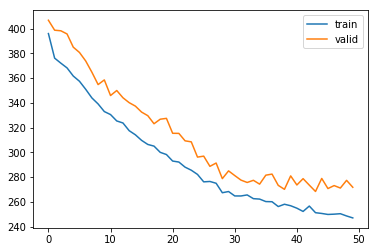

In [332]:
# plot history
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [334]:
y_pred0 = model2.predict(X_test)[:,0]

In [335]:
mse0 = mean_squared_error(y_test[:,0],y_pred0)

In [336]:
mse0

62.22343149239635

In [339]:
y_pred1 = model2.predict(X_test)[:,1]

In [340]:
mse1 = mean_squared_error(y_test[:,1],y_pred1)

In [341]:
mse1

173.2092338921719

In [342]:
y_pred2 = model2.predict(X_test)[:,2]

In [343]:
mse2 = mean_squared_error(y_test[:,2],y_pred2)

In [344]:
mse2

519.6459213053824

# Model 3 - 2 hidden layer - increase nodes

In [345]:
import keras
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, Input, TimeDistributed 

In [346]:
model3 = Sequential() #layers [1,50,50,50,50,1]
model3.add(LSTM(input_shape=(1,40),units=200,return_sequences=True))
model3.add(Dropout(0.3))
model3.add(LSTM(input_shape=(None,200),units=150,return_sequences=True))
model3.add(Dropout(0.3))
model3.add(LSTM(input_shape=(None,150),units=100,return_sequences=True))
model3.add(Dropout(0.3))
model3.add(LSTM(100,return_sequences=False))
model3.add(Dropout(0.3))
model3.add(Dense(3, activation='relu'))
# model.add(Activation("sigmoid"))
#start = time.time()
model3.compile(loss="mse", optimizer="rmsprop")
#print("Compilation Time : ", time.time() - start)
print(model3.summary())

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_97 (LSTM)               (None, 1, 200)            192800    
_________________________________________________________________
dropout_97 (Dropout)         (None, 1, 200)            0         
_________________________________________________________________
lstm_98 (LSTM)               (None, 1, 150)            210600    
_________________________________________________________________
dropout_98 (Dropout)         (None, 1, 150)            0         
_________________________________________________________________
lstm_99 (LSTM)               (None, 1, 100)            100400    
_________________________________________________________________
dropout_99 (Dropout)         (None, 1, 100)            0         
_________________________________________________________________
lstm_100 (LSTM)              (None, 100)             

In [347]:
history3 = model3.fit(X_train,y_train,batch_size=24,epochs=100,validation_split=0.1)

Train on 8689 samples, validate on 966 samples
Epoch 1/100
8689/8689 [==============================] - 13s 1ms/step - loss: 397.5114 - val_loss: 413.0687
Epoch 2/100
8689/8689 [==============================] - 6s 640us/step - loss: 376.8308 - val_loss: 407.7505
Epoch 3/100
8689/8689 [==============================] - 5s 626us/step - loss: 372.3282 - val_loss: 395.1466
Epoch 4/100
8689/8689 [==============================] - 5s 630us/step - loss: 368.5408 - val_loss: 394.4978
Epoch 5/100
8689/8689 [==============================] - 6s 634us/step - loss: 363.5380 - val_loss: 393.8542
Epoch 6/100
8689/8689 [==============================] - 6s 638us/step - loss: 357.9809 - val_loss: 381.4270
Epoch 7/100
8689/8689 [==============================] - 5s 625us/step - loss: 353.0023 - val_loss: 375.6488
Epoch 8/100
8689/8689 [==============================] - 5s 631us/step - loss: 345.5112 - val_loss: 368.5109
Epoch 9/100
8689/8689 [==============================] - 5s 624us/step - loss: 340

In [ ]:
# plot history
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [349]:
y_pred0 = model1.predict(X_test)[:,0]

In [350]:
mse0 = mean_squared_error(y_test[:,0],y_pred0)

In [351]:
mse0

59.66795783704873

In [352]:
y_pred1 = model1.predict(X_test)[:,1]

In [353]:
mse1 = mean_squared_error(y_test[:,1],y_pred1)

In [354]:
mse1

162.67182000616793

In [355]:
y_pred2 = model1.predict(X_test)[:,2]

In [356]:
mse2 = mean_squared_error(y_test[:,2],y_pred2)

In [357]:
mse2

497.42270344341375

# Model 4 - 2 hidden layer - adam default

In [358]:
import keras
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, Input, TimeDistributed 

In [363]:
model4 = Sequential() #layers [1,50,50,50,50,1]
model4.add(LSTM(input_shape=(1,40),units=150,return_sequences=True))
model4.add(Dropout(0.3))
model4.add(LSTM(input_shape=(None,150),units=100,return_sequences=True))
model4.add(Dropout(0.3))
model4.add(LSTM(input_shape=(None,100),units=100,return_sequences=True))
model4.add(Dropout(0.3))
model4.add(LSTM(100,return_sequences=False))
model4.add(Dropout(0.3))
model4.add(Dense(3, activation='relu'))
# model.add(Activation("sigmoid"))
#start = time.time()
model4.compile(loss="mse", optimizer="adam")
#print("Compilation Time : ", time.time() - start)
print(model4.summary())

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_113 (LSTM)              (None, 1, 150)            114600    
_________________________________________________________________
dropout_113 (Dropout)        (None, 1, 150)            0         
_________________________________________________________________
lstm_114 (LSTM)              (None, 1, 100)            100400    
_________________________________________________________________
dropout_114 (Dropout)        (None, 1, 100)            0         
_________________________________________________________________
lstm_115 (LSTM)              (None, 1, 100)            80400     
_________________________________________________________________
dropout_115 (Dropout)        (None, 1, 100)            0         
_________________________________________________________________
lstm_116 (LSTM)              (None, 100)             

In [365]:
history4 = model4.fit(X_train,y_train,batch_size=24,epochs=100,validation_split=0.1)

Train on 8689 samples, validate on 966 samples
Epoch 1/100
7560/8689 [=========================>....] - ETA: 0s - loss: 203.3735

KeyboardInterrupt: 

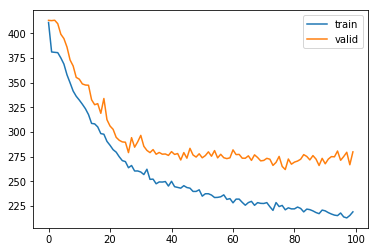

In [366]:
# plot history
plt.plot(history4.history['loss'], label='train')
plt.plot(history4.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [367]:
y_pred0 = model4.predict(X_test)[:,0]

In [368]:
mse0 = mean_squared_error(y_test[:,0],y_pred0)

In [369]:
mse0

61.06285505132751

In [370]:
y_pred1 = model4.predict(X_test)[:,1]

In [371]:
mse1 = mean_squared_error(y_test[:,1],y_pred1)

In [372]:
mse1

167.48808938144367

In [373]:
y_pred2 = model4.predict(X_test)[:,2]

In [374]:
mse2 = mean_squared_error(y_test[:,2],y_pred2)

In [375]:
mse2

498.1137490293585

# Model 5 - 2 hidden layer - adam small learning rate

In [442]:
import keras
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, Input, TimeDistributed 

In [443]:
adam_small_learning_rate = keras.optimizers.Adamax(learning_rate=0.0005, beta_1=0.9, beta_2=0.999)

In [444]:
model5 = Sequential() #layers [1,50,50,50,50,1]
model5.add(LSTM(input_shape=(1,40),units=150,return_sequences=True))
model5.add(Dropout(0.3))
model5.add(LSTM(input_shape=(None,150),units=100,return_sequences=True))
model5.add(Dropout(0.3))
model5.add(LSTM(input_shape=(None,100),units=100,return_sequences=True))
model5.add(Dropout(0.3))
model5.add(LSTM(100,return_sequences=False))
model5.add(Dropout(0.3))
model5.add(Dense(3, activation='relu'))
# model.add(Activation("sigmoid"))
#start = time.time()
model5.compile(loss="mse", optimizer=adam_small_learning_rate)
#print("Compilation Time : ", time.time() - start)
print(model5.summary())

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_129 (LSTM)              (None, 1, 150)            114600    
_________________________________________________________________
dropout_129 (Dropout)        (None, 1, 150)            0         
_________________________________________________________________
lstm_130 (LSTM)              (None, 1, 100)            100400    
_________________________________________________________________
dropout_130 (Dropout)        (None, 1, 100)            0         
_________________________________________________________________
lstm_131 (LSTM)              (None, 1, 100)            80400     
_________________________________________________________________
dropout_131 (Dropout)        (None, 1, 100)            0         
_________________________________________________________________
lstm_132 (LSTM)              (None, 100)             

In [ ]:
history5 = model5.fit(X_train,y_train,batch_size=24,epochs=1000,validation_split=0.1)

Train on 8689 samples, validate on 966 samples
Epoch 1/1000
8689/8689 [==============================] - 7s 811us/step - loss: 239.7343 - val_loss: 284.1394
Epoch 2/1000
8689/8689 [==============================] - 7s 863us/step - loss: 240.5582 - val_loss: 285.8930
Epoch 3/1000
8689/8689 [==============================] - 7s 828us/step - loss: 242.3080 - val_loss: 282.9683
Epoch 4/1000
8689/8689 [==============================] - 7s 844us/step - loss: 241.4610 - val_loss: 286.2217
Epoch 5/1000
8689/8689 [==============================] - 8s 885us/step - loss: 241.8661 - val_loss: 284.4499
Epoch 6/1000
8689/8689 [==============================] - 8s 959us/step - loss: 241.8864 - val_loss: 285.0927
Epoch 7/1000
8689/8689 [==============================] - 7s 844us/step - loss: 239.0230 - val_loss: 283.6980
Epoch 8/1000
8689/8689 [==============================] - 7s 791us/step - loss: 241.0627 - val_loss: 283.1534
Epoch 9/1000
8689/8689 [==============================] - 7s 811us/step -

8689/8689 [==============================] - 7s 855us/step - loss: 226.4491 - val_loss: 271.4206
Epoch 148/1000
8689/8689 [==============================] - 7s 806us/step - loss: 230.9853 - val_loss: 272.7137
Epoch 149/1000
8689/8689 [==============================] - 7s 783us/step - loss: 229.3259 - val_loss: 272.8459
Epoch 150/1000
8689/8689 [==============================] - 6s 674us/step - loss: 229.4636 - val_loss: 272.0824
Epoch 151/1000
8689/8689 [==============================] - 6s 725us/step - loss: 226.5162 - val_loss: 273.8713
Epoch 152/1000
8689/8689 [==============================] - 7s 793us/step - loss: 227.2289 - val_loss: 274.7999
Epoch 153/1000
8689/8689 [==============================] - 6s 731us/step - loss: 223.1760 - val_loss: 272.3804
Epoch 154/1000
8689/8689 [==============================] - 8s 869us/step - loss: 226.9524 - val_loss: 272.7631
Epoch 155/1000
8689/8689 [==============================] - 6s 690us/step - loss: 225.5385 - val_loss: 274.7432
Epoch 1

8689/8689 [==============================] - 8s 864us/step - loss: 219.8773 - val_loss: 272.9263
Epoch 294/1000
8689/8689 [==============================] - 7s 839us/step - loss: 221.1563 - val_loss: 272.8167
Epoch 295/1000
8689/8689 [==============================] - 8s 888us/step - loss: 222.7966 - val_loss: 272.6899
Epoch 296/1000
8689/8689 [==============================] - 8s 871us/step - loss: 218.7542 - val_loss: 271.8995
Epoch 297/1000
8689/8689 [==============================] - 7s 845us/step - loss: 219.7908 - val_loss: 270.9204
Epoch 298/1000
8689/8689 [==============================] - 7s 836us/step - loss: 219.8599 - val_loss: 271.3937
Epoch 299/1000
8689/8689 [==============================] - 8s 974us/step - loss: 221.1343 - val_loss: 269.9056
Epoch 300/1000
8689/8689 [==============================] - 9s 1ms/step - loss: 219.1209 - val_loss: 272.0107
Epoch 301/1000
8689/8689 [==============================] - 9s 1ms/step - loss: 220.1034 - val_loss: 270.8699
Epoch 302/1

8689/8689 [==============================] - 4s 512us/step - loss: 214.5099 - val_loss: 272.3324
Epoch 440/1000
8689/8689 [==============================] - 6s 686us/step - loss: 214.0694 - val_loss: 270.9994
Epoch 441/1000
8689/8689 [==============================] - 6s 724us/step - loss: 214.4229 - val_loss: 271.3165
Epoch 442/1000
8689/8689 [==============================] - 7s 759us/step - loss: 214.6181 - val_loss: 272.0853
Epoch 443/1000
8689/8689 [==============================] - 6s 723us/step - loss: 213.6044 - val_loss: 271.8765
Epoch 444/1000
8689/8689 [==============================] - 6s 635us/step - loss: 214.2282 - val_loss: 270.5306
Epoch 445/1000
8689/8689 [==============================] - 6s 701us/step - loss: 214.5686 - val_loss: 271.1839
Epoch 446/1000
8689/8689 [==============================] - 7s 764us/step - loss: 214.9656 - val_loss: 272.9384
Epoch 447/1000
8689/8689 [==============================] - 7s 858us/step - loss: 216.0332 - val_loss: 272.0513
Epoch 4

8689/8689 [==============================] - 7s 819us/step - loss: 210.2050 - val_loss: 270.8576
Epoch 586/1000
8689/8689 [==============================] - 8s 877us/step - loss: 207.2605 - val_loss: 272.7274
Epoch 587/1000
8689/8689 [==============================] - 8s 915us/step - loss: 209.9467 - val_loss: 271.4650
Epoch 588/1000
8689/8689 [==============================] - 8s 894us/step - loss: 211.4782 - val_loss: 271.4993
Epoch 589/1000
8689/8689 [==============================] - 8s 868us/step - loss: 208.4760 - val_loss: 270.8753
Epoch 590/1000
8689/8689 [==============================] - 8s 904us/step - loss: 211.0144 - val_loss: 270.9258s - loss: 211.
Epoch 591/1000
8689/8689 [==============================] - 7s 820us/step - loss: 208.0445 - val_loss: 272.0082
Epoch 592/1000
8689/8689 [==============================] - 7s 816us/step - loss: 211.3261 - val_loss: 270.9429
Epoch 593/1000
8689/8689 [==============================] - 7s 844us/step - loss: 208.8143 - val_loss: 27

8689/8689 [==============================] - 5s 589us/step - loss: 205.9148 - val_loss: 270.9389
Epoch 732/1000
8689/8689 [==============================] - 4s 506us/step - loss: 205.9746 - val_loss: 271.3886
Epoch 733/1000
8689/8689 [==============================] - 4s 510us/step - loss: 207.1165 - val_loss: 272.3340
Epoch 734/1000
8689/8689 [==============================] - 5s 567us/step - loss: 207.6585 - val_loss: 273.9324
Epoch 735/1000
8689/8689 [==============================] - 4s 508us/step - loss: 208.2474 - val_loss: 272.6886
Epoch 736/1000
8689/8689 [==============================] - 6s 686us/step - loss: 204.3688 - val_loss: 271.6178
Epoch 737/1000
8689/8689 [==============================] - 5s 620us/step - loss: 205.1370 - val_loss: 272.1860
Epoch 738/1000
8689/8689 [==============================] - 5s 598us/step - loss: 205.3216 - val_loss: 271.0234
Epoch 739/1000
8689/8689 [==============================] - 5s 611us/step - loss: 207.0241 - val_loss: 270.0536
Epoch 7

8689/8689 [==============================] - 7s 811us/step - loss: 202.5054 - val_loss: 271.9072
Epoch 878/1000
8689/8689 [==============================] - 7s 812us/step - loss: 203.2110 - val_loss: 271.0488
Epoch 879/1000
8689/8689 [==============================] - 8s 973us/step - loss: 200.5424 - val_loss: 270.1223
Epoch 880/1000
8689/8689 [==============================] - 6s 681us/step - loss: 202.8547 - val_loss: 270.3060
Epoch 881/1000
8689/8689 [==============================] - 7s 760us/step - loss: 205.3553 - val_loss: 270.7764
Epoch 882/1000
8689/8689 [==============================] - 6s 669us/step - loss: 201.6608 - val_loss: 269.8398
Epoch 883/1000
8689/8689 [==============================] - 6s 719us/step - loss: 201.3774 - val_loss: 271.2076
Epoch 884/1000
8689/8689 [==============================] - 6s 674us/step - loss: 199.1568 - val_loss: 268.8312
Epoch 885/1000
8689/8689 [==============================] - 6s 667us/step - loss: 202.2673 - val_loss: 268.1130
Epoch 8

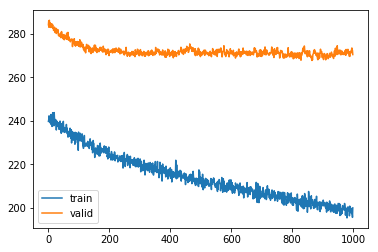

In [457]:
# plot history
plt.plot(history5.history['loss'], label='train')
plt.plot(history5 .history['val_loss'], label='valid')
plt.legend()
plt.show()

In [458]:
y_pred0 = model5.predict(X_test)[:,0]

In [459]:
mse0 = mean_squared_error(y_test[:,0],y_pred0)

In [460]:
mse0

62.21646433509277

In [461]:
y_pred1 = model5.predict(X_test)[:,1]

In [462]:
mse1 = mean_squared_error(y_test[:,1],y_pred1)

In [463]:
mse1

166.01973531206212

In [464]:
y_pred2 = model5.predict(X_test)[:,2]

In [465]:
mse2 = mean_squared_error(y_test[:,2],y_pred2)

In [466]:
mse2

496.167178266579

# Model 6 - autoencoder

In [488]:
import keras
from keras.models import Sequential,Model
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, Input, TimeDistributed 

In [489]:
y_train_new = y_train.reshape(y_train.shape[0],1,y_train.shape[1])

In [490]:
inputs_ae = Input(shape=(1,40))
encoded_ae = LSTM(128, return_sequences=True, dropout=0.3)(inputs_ae, training=True)
decoded_ae = LSTM(64, return_sequences=True, dropout=0.3)(encoded_ae, training=True)
out_ae = TimeDistributed(Dense(3))(decoded_ae)
sequence_autoencoder = Model(inputs_ae, out_ae)
sequence_autoencoder.compile(optimizer='adam', loss='mse', metrics=['mse'])
sequence_autoencoder.fit(X_train, y_train_new, batch_size=24, epochs=50, verbose=2, shuffle=True)

Epoch 1/50
 - 6s - loss: 422.4182 - mse: 422.4181
Epoch 2/50
 - 3s - loss: 382.6845 - mse: 382.6845
Epoch 3/50
 - 3s - loss: 379.5326 - mse: 379.5327
Epoch 4/50
 - 4s - loss: 377.7770 - mse: 377.7771
Epoch 5/50
 - 4s - loss: 375.6486 - mse: 375.6488
Epoch 6/50
 - 3s - loss: 374.4937 - mse: 374.4935
Epoch 7/50
 - 4s - loss: 373.3650 - mse: 373.3649
Epoch 8/50
 - 3s - loss: 370.0797 - mse: 370.0798
Epoch 9/50
 - 3s - loss: 368.5080 - mse: 368.5081
Epoch 10/50
 - 4s - loss: 364.9393 - mse: 364.9394
Epoch 11/50
 - 4s - loss: 364.7371 - mse: 364.7372
Epoch 12/50
 - 3s - loss: 362.7928 - mse: 362.7927
Epoch 13/50
 - 3s - loss: 362.4486 - mse: 362.4484
Epoch 14/50
 - 4s - loss: 359.9206 - mse: 359.9206
Epoch 15/50
 - 3s - loss: 361.3414 - mse: 361.3413
Epoch 16/50
 - 3s - loss: 358.5433 - mse: 358.5432
Epoch 17/50
 - 4s - loss: 359.0721 - mse: 359.0722
Epoch 18/50
 - 3s - loss: 356.1097 - mse: 356.1098
Epoch 19/50
 - 3s - loss: 354.8625 - mse: 354.8627
Epoch 20/50
 - 3s - loss: 350.3217 - mse

In [491]:
encoder = Model(inputs_ae, encoded_ae)
X_train_encode = encoder.predict(X_train)

In [492]:
X_train_encode.shape

(9655, 1, 128)

In [512]:
X_train_new = np.concatenate([X_train, X_train_encode],axis=2)

In [513]:
X_train_new.shape

(9655, 1, 168)

In [514]:
model6 = Sequential() #layers [1,50,50,50,50,1]
model6.add(LSTM(input_shape=(1,168),units=100,return_sequences=True))
model6.add(Dropout(0.3))
model6.add(LSTM(input_shape=(None,100),units=100,return_sequences=True))
model6.add(Dropout(0.3))
model6.add(LSTM(100,return_sequences=False))
model6.add(Dropout(0.3))
model6.add(Dense(3, activation='relu'))
# model.add(Activation("sigmoid"))
#start = time.time()
model6.compile(loss="mse", optimizer="rmsprop")
#print("Compilation Time : ", time.time() - start)
print(model6.summary())

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_154 (LSTM)              (None, 1, 100)            107600    
_________________________________________________________________
dropout_144 (Dropout)        (None, 1, 100)            0         
_________________________________________________________________
lstm_155 (LSTM)              (None, 1, 100)            80400     
_________________________________________________________________
dropout_145 (Dropout)        (None, 1, 100)            0         
_________________________________________________________________
lstm_156 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dropout_146 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 3)               

In [515]:
history6 = model6.fit(X_train_new,y_train,batch_size=24,epochs=100,validation_split=0.1)

Train on 8689 samples, validate on 966 samples
Epoch 1/100
8689/8689 [==============================] - 13s 2ms/step - loss: 393.8904 - val_loss: 394.5651
Epoch 2/100
8689/8689 [==============================] - 5s 581us/step - loss: 363.0375 - val_loss: 380.3920
Epoch 3/100
8689/8689 [==============================] - 5s 535us/step - loss: 351.5477 - val_loss: 374.8509
Epoch 4/100
8689/8689 [==============================] - 4s 486us/step - loss: 346.7003 - val_loss: 368.9642
Epoch 5/100
8689/8689 [==============================] - 4s 492us/step - loss: 340.1702 - val_loss: 366.2971
Epoch 6/100
8689/8689 [==============================] - 5s 521us/step - loss: 337.1610 - val_loss: 362.1720
Epoch 7/100
8689/8689 [==============================] - 4s 447us/step - loss: 330.8061 - val_loss: 357.1414
Epoch 8/100
8689/8689 [==============================] - 4s 436us/step - loss: 329.2009 - val_loss: 357.1215
Epoch 9/100
8689/8689 [==============================] - 3s 349us/step - loss: 326

8689/8689 [==============================] - 5s 590us/step - loss: 223.3117 - val_loss: 310.9122
Epoch 76/100
8689/8689 [==============================] - 5s 536us/step - loss: 224.0530 - val_loss: 304.2484
Epoch 77/100
8689/8689 [==============================] - 4s 481us/step - loss: 223.9577 - val_loss: 305.8271
Epoch 78/100
8689/8689 [==============================] - 4s 416us/step - loss: 220.8747 - val_loss: 318.4122
Epoch 79/100
8689/8689 [==============================] - 4s 431us/step - loss: 224.7066 - val_loss: 322.9605
Epoch 80/100
8689/8689 [==============================] - 4s 417us/step - loss: 222.6342 - val_loss: 317.1972
Epoch 81/100
8689/8689 [==============================] - 4s 414us/step - loss: 218.8324 - val_loss: 317.8761
Epoch 82/100
8689/8689 [==============================] - 4s 421us/step - loss: 220.0227 - val_loss: 311.4760
Epoch 83/100
8689/8689 [==============================] - 4s 441us/step - loss: 217.2634 - val_loss: 326.2491
Epoch 84/100
8689/8689 

In [516]:
X_test_encode = encoder.predict(X_test)
X_test_new = np.concatenate([X_test, X_test_encode],axis=2)

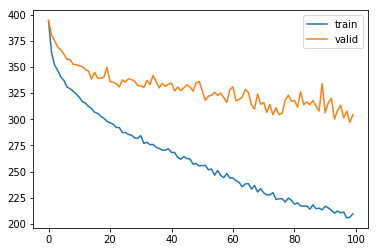

In [517]:
# plot history
plt.plot(history6.history['loss'], label='train')
plt.plot(history6.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [519]:
y_pred0 = model6.predict(X_test_new)[:,0]

In [520]:
mse0 = mean_squared_error(y_test[:,0],y_pred0)

In [521]:
np.sqrt(mse0)

7.972452714982072

In [522]:
y_pred1 = model6.predict(X_test_new)[:,1]

In [523]:
mse1 = mean_squared_error(y_test[:,1],y_pred1)

In [524]:
np.sqrt(mse1)

13.757791729927154

In [525]:
y_pred2 = model6.predict(X_test_new)[:,2]

In [526]:
mse2 = mean_squared_error(y_test[:,2],y_pred2)

In [527]:
np.sqrt(mse2)

24.10757662827915